In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dpath = "./data/sur/S8_BeforeIRRAD_200V_TestPulse_SpidrTime_18May_surrog_fitpars_perpix_NNsmoothingON.dat"
df = pd.read_csv(dpath, skiprows=3, names=['col','row', 'p0', 'p1', 'c', 't'], sep=" ")
sensor, second = dpath.split("/")[-1].split("_")[0:2]

In [3]:
df.head()## fit function ToT = f(q) =

col  row       p0        p1        c        t
0    0    0  5.15259  0.005470  6081.50  243.527
1    0    1  3.65710  0.005588  5928.65  427.109
2    0    2  3.53007  0.005567  5773.41  438.561
3    0    3  4.09026  0.005587  5012.92  624.960
4    0    4  4.79721  0.005269  6584.88  261.828

In [4]:
sur_mat = np.zeros((256,256,4))

In [5]:
for i, row in df.iterrows():
    sur_mat[int(row['col']),int(row['row'])] = [row['p0'],row['p1'],row['c'],row['t']]

In [6]:
max_tp_charge = 8000

In [7]:
## fit function ToT = f(q) = [p0 + p1*q - c/(q-t)]
def sur_fun(x, p0, p1, c, t):
    return p0 + p1*x - c/(x-t)
def make_sur(p0, p1, c, t):
    return lambda x : p0 + p1*x - c/(x-t)

def calc_sur(x, p0, p1, c, t):
    sur = make_sur(p0, p1, c, t)
    y = sur(x)
    y[x-t<0] = float("-inf")
    return y

In [8]:
x = np.linspace(900, max_tp_charge, 500)

In [9]:
df2 = pd.read_csv("data/bin_map/EllipticIRRAD8.csv", skiprows=1, names=['col','row','bin'], sep=" ")

In [10]:
bin_map = np.zeros((256,256), dtype=np.int)

In [11]:
for i, row in df2.iterrows():
    bin_map[int(row['col']),int(row['row'])] = row['bin']

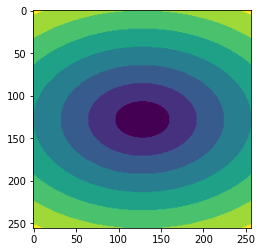

In [12]:
plt.imshow(bin_map)

In [13]:
badboysx = []
badboysy = []
suromap = []
linmap = []
asymap = []
suromappure = []
binsused = np.unique(bin_map)

for bin_id in binsused:
    #bin_id=0
    xid, yid = np.where(bin_map == bin_id)
    ys = np.zeros((len(xid), len(x)))
    ypure = np.zeros((len(xid), len(x)))
    for i, pars in enumerate(sur_mat[xid,yid]):
        ys[i] = calc_sur(x, *pars)
        ypure[i] = sur_fun(x, *pars)
    suromap.append(ys)
    suromappure.append(ypure)


In [14]:
ys = suromap[0]

In [15]:
ys

array([[ 0.19377024,  0.4122056 ,  0.62542216, ..., 43.25589917,
        43.32933329, 43.40276222],
       [-1.25398812, -0.93106141, -0.62012284, ..., 45.65072131,
        45.72791649, 45.80510665],
       [-0.11781779,  0.12464967,  0.36050689, ..., 45.24137835,
        45.31894584, 45.39650848],
       ...,
       [-4.4416717 , -3.95570135, -3.4916611 , ..., 51.69009579,
        51.7781    , 51.86609774],
       [ 1.00377974,  1.24658863,  1.48458744, ..., 52.79253427,
        52.88084389, 52.96914634],
       [-0.99500736, -0.6960506 , -0.40487638, ..., 52.81807954,
        52.90782342, 52.99756023]])

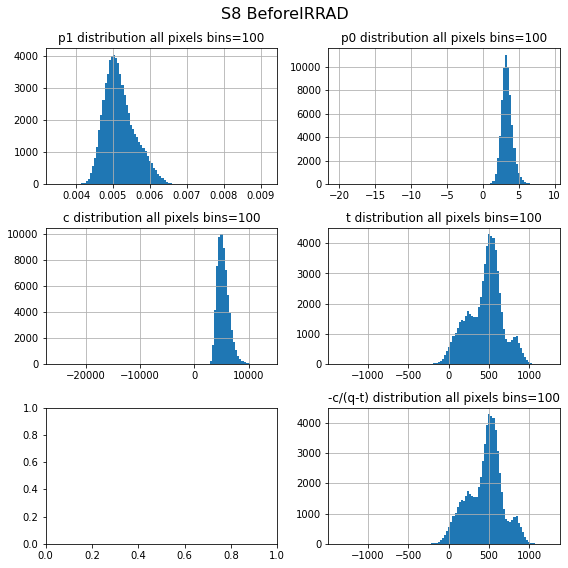

In [16]:
fig,axes = plt.subplots(3,2, figsize=(8,8))
fig.suptitle(sensor+ " " +second, fontsize=16)
ax = df['p1'].hist(ax=axes[0][0],bins=100)

ax.set_title("p1 distribution all pixels bins=100")

ax = df['p0'].hist(ax=axes[0][1],bins=100)

ax.set_title("p0 distribution all pixels bins=100")

ax = df['c'].hist(ax=axes[1][0],bins=100)

ax.set_title("c distribution all pixels bins=100")

ax = df['t'].hist(ax=axes[1][1],bins=100)

ax.set_title("t distribution all pixels bins=100")

ax = df['t'].hist(ax=axes[2][1],bins=100)

ax.set_title("-c/(q-t) distribution all pixels bins=100")

fig.tight_layout()
fig.savefig('{}_{}_surrogates.png'.format(sensor,second))

In [17]:
tys = ys.T[0]

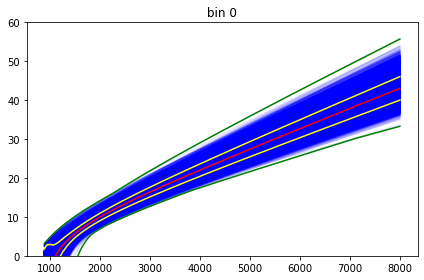

In [18]:
bin_list = np.unique(bin_map)

fig, axes = plt.subplots(1)
b = 0
ys = suromap[5]
axes.set_title(" bin 0 ")
for y in ys:
    axes.plot(x,y, color='blue', alpha=0.1)
yyy = ys
yyy[yyy==float("-inf")]= np.nan
yyy[yyy<=-60]= np.nan
mn = np.nanmean(yyy, axis=0)
axes.plot(x, mn, color='red')
axes.plot(x, np.nanmin(yyy, axis=0), color='green')
axes.plot(x, np.nanmax(yyy, axis=0), color='green')
axes.plot(x, mn-np.nanstd(yyy, axis=0), color='yellow')
axes.plot(x, mn+np.nanstd(yyy, axis=0), color='yellow')
axes.set_ylim([-0,60])
fig.tight_layout()

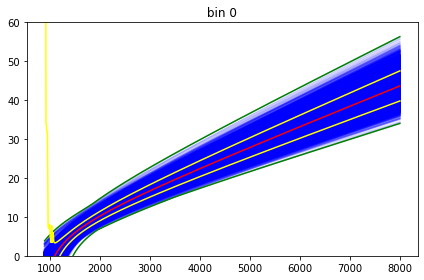

In [19]:
bin_list = np.unique(bin_map)

fig, axes = plt.subplots(1)
b = 0
ys = suromap[6]
axes.set_title(" bin 0 ")
for y in ys:
    axes.plot(x,y, color='blue', alpha=0.1)
yyy = ys
yyy[yyy==float("-inf")]= np.nan
yyy[yyy<=-10000]= np.nan
mn = np.nanmean(yyy, axis=0)
axes.plot(x, mn, color='red')
axes.plot(x, np.nanmin(yyy, axis=0), color='green')
axes.plot(x, np.nanmax(yyy, axis=0), color='green')
axes.plot(x, mn-np.nanstd(yyy, axis=0), color='yellow')
axes.plot(x, mn+np.nanstd(yyy, axis=0), color='yellow')
axes.set_ylim([-0,60])
fig.tight_layout()

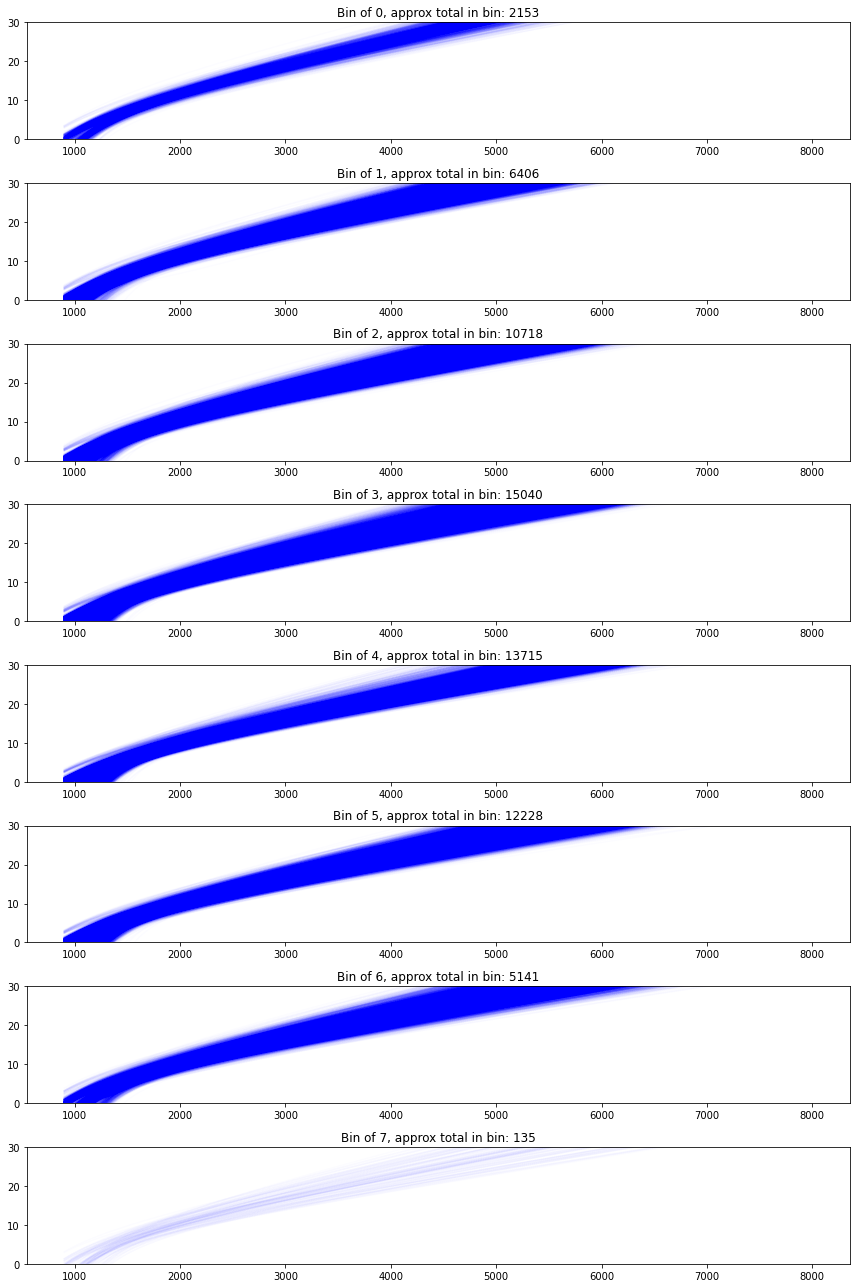

In [20]:
bin_list = np.unique(bin_map)
fig, axes = plt.subplots(len(binsused), figsize=(12, 18))
for i,(b, ys) in enumerate(zip(binsused, suromap)):
    axes[i].set_title("Bin of {}, approx total in bin: {}".format(b, len(ys)))
    for y in ys:
        axes[i].plot(x,y, color='blue', alpha=(0.01))
    axes[i].set_ylim([-0.01,30])
fig.tight_layout()
fig.savefig('{}_{}_surrogates.png'.format(sensor,second))

In [21]:
from scipy.optimize import curve_fit 

In [22]:
yyy = suromap[0]

In [23]:
yyy.shape

(2153, 500)

In [24]:
xfit =  np.tile(x, yyy.shape[0])
yfit = yyy.flatten()

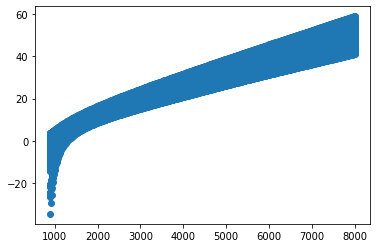

In [33]:
plt.scatter(xfit, yfit)

In [34]:
seed = [5.15259e+00, 5.46956e-03, 6.08150e+03, 2.43527e+02]

In [35]:
fitparams, fitcov = curve_fit(sur_fun, xfit, yfit, seed, ftol=0.00001)

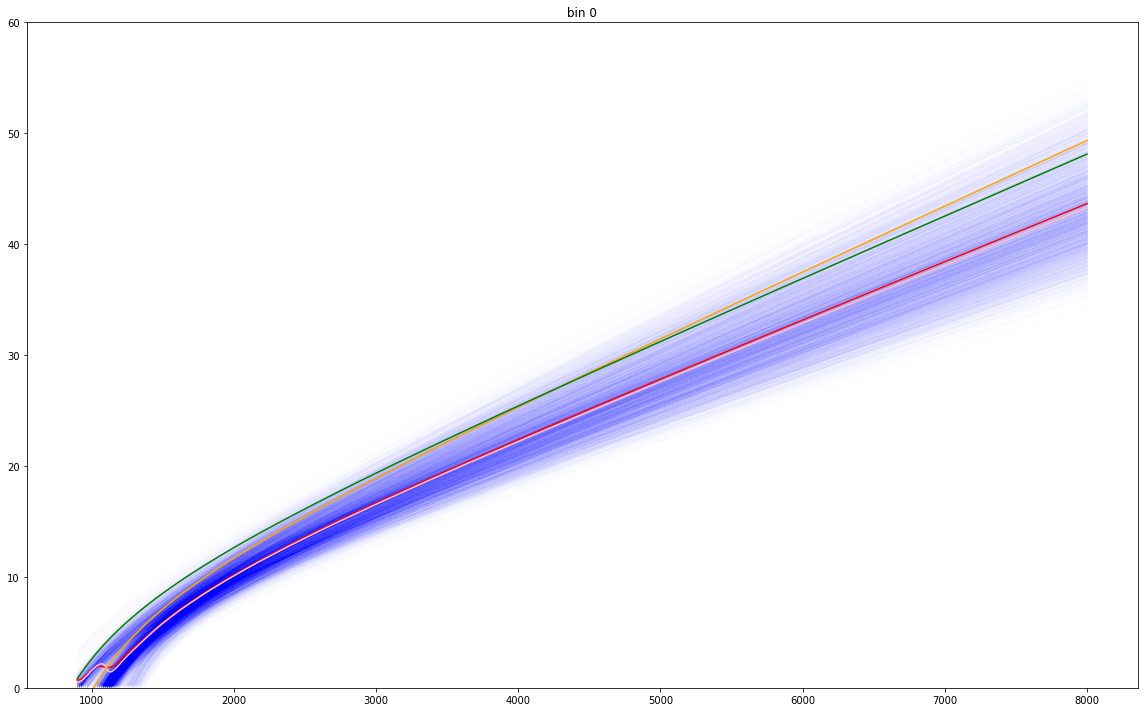

In [41]:
bin_list = np.unique(bin_map)

fig, axes = plt.subplots(1, figsize=(16,10))
b = 0
ys = suromap[6]
axes.set_title(" bin 0 ")
for y in ys:
    axes.plot(x,y, color='blue', alpha=0.1)
yyy = ys
yy2 = yyy.copy()
yyy[yyy==float("-inf")]= np.nan

yyy[yyy<=-0]= np.nan
mn = np.nanmean(yyy, axis=0)
axes.plot(x, mn, color='red')
mn = np.nanmedian(yyy, axis=0)
axes.plot(x, mn, color='pink')
fitted = sur_fun(x, *fitparams)
axes.plot(x, fitted, color='orange')
axes.plot(x, sur_fun(x, *seed), color='green')
axes.set_ylim([-0,60])
fig.tight_layout()

In [29]:
mn.shape

(500,)

In [30]:
fitparams, fitcov = curve_fit(sur_fun, x, mn, seed, ftol=0.00001)

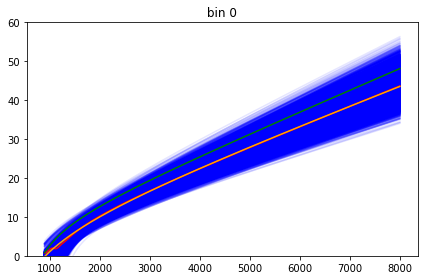

In [31]:
bin_list = np.unique(bin_map)

fig, axes = plt.subplots(1)
b = 0
ys = suromap[6]
axes.set_title(" bin 0 ")
for y in ys:
    axes.plot(x,y, color='blue', alpha=0.1)
yyy = ys
yy2 = yyy.copy()
yyy[yyy==float("-inf")]= np.nan

yyy[yyy<=-0]= np.nan
mn = np.nanmean(yyy, axis=0)
axes.plot(x, mn, color='red')
fitted = sur_fun(x, *fitparams)
axes.plot(x, fitted, color='orange')
axes.plot(x, sur_fun(x, *seed), color='green')
axes.set_ylim([-0,60])
fig.tight_layout()

In [35]:
fitparams

array([ 6.04220309e+00,  4.89885139e-03,  1.42759006e+04, -4.40192218e+02])

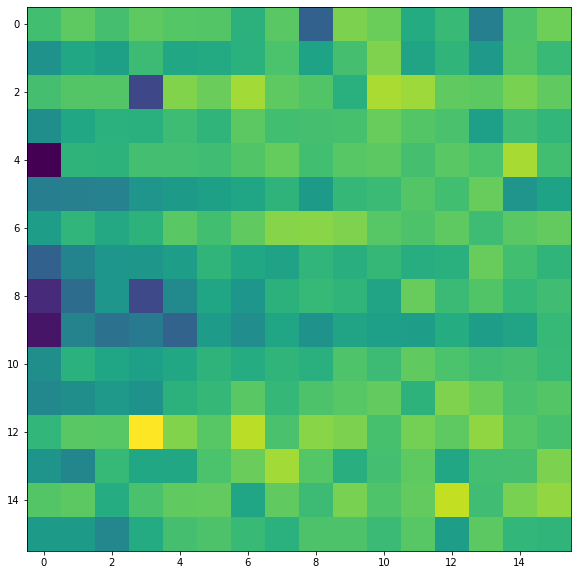

In [48]:
fig, axes = plt.subplots(1, figsize=(16,10))
axes.imshow(sur_mat[::16,::16,3])

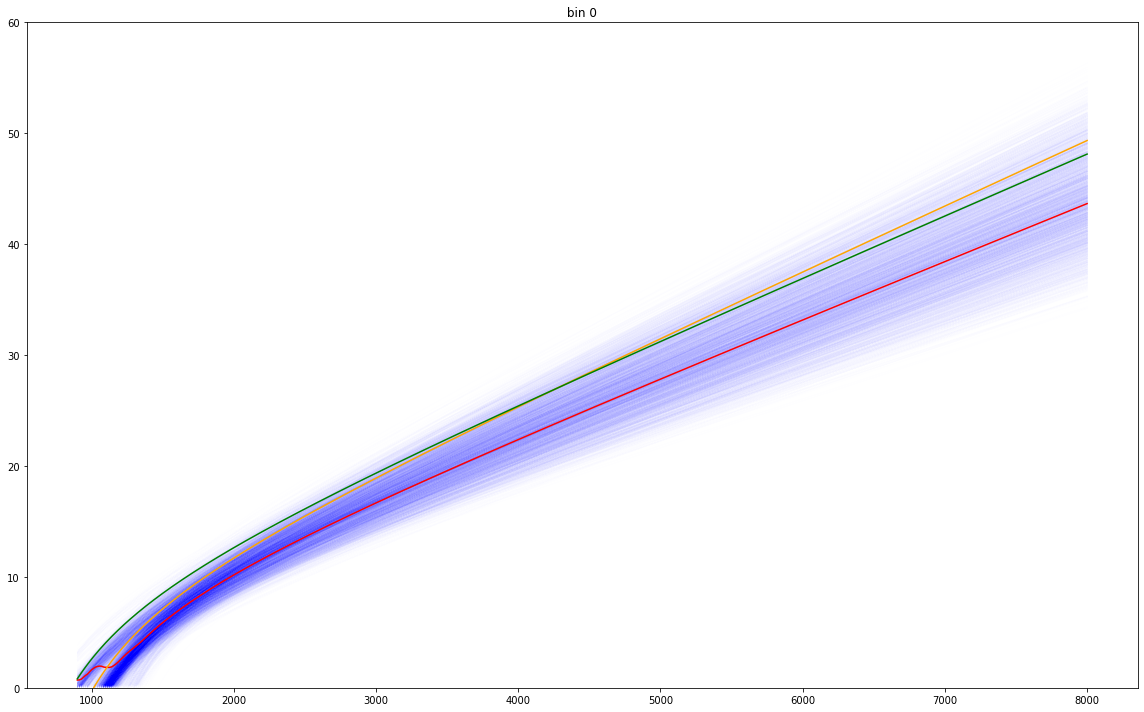

In [55]:
fitparams, fitcov = curve_fit(sur_fun, xfit, yfit, seed, ftol=0.00001, method='trf')
bin_list = np.unique(bin_map)

fig, axes = plt.subplots(1, figsize=(16,10))
b = 0
ys = suromap[6]
axes.set_title(" bin 0 ")
for y in ys[:4000]:
    axes.plot(x,y, color='blue', alpha=0.005)
yyy = ys
yy2 = yyy.copy()
yyy[yyy==float("-inf")]= np.nan


yyy[yyy<=-0]= np.nan
mn = np.nanmean(yyy, axis=0)
axes.plot(x, mn, color='red')
fitted = sur_fun(x, *fitparams)
axes.plot(x, fitted, color='orange')
axes.plot(x, sur_fun(x, *seed), color='green')
axes.set_ylim([-0,60])
fig.tight_layout()